In [3]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='bfb61244-c2af-4323-a61f-e78dca48dac6', project_access_token='p-3256f448789d036851150a1a8b64c38071d0cb9c')
pc = project.project_context


In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb




In [5]:
import os


In [6]:
import ibm_boto3
from botocore.client import Config
import json
import pandas as pd

In [7]:
credentials_1={
  "apikey": "iIy1ja3nJeoTyJp1aMFdYEjeJOX2oT1R_ZLu95WwxB1w",
  "endpoints": "https://control.cloud-object-storage.cloud.ibm.com/v2/endpoints",
  "iam_apikey_description": "Auto-generated for key 4fab988b-1998-4389-bd3a-4ae49231879e",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/41e4ee9f47d74c098791bc4a04a3297a::serviceid:ServiceId-a9dfb341-a113-4c65-99c4-316af403f556",
  "resource_instance_id": "crn:v1:bluemix:public:cloud-object-storage:global:a/41e4ee9f47d74c098791bc4a04a3297a:48f78d71-c953-488a-ba29-afe918824e0d::"
}

In [8]:
cos = ibm_boto3.client('s3',
                       ibm_api_key_id=credentials_1['apikey'],
                       ibm_service_instance_id=credentials_1['iam_serviceid_crn'],
                       ibm_auth_endpoint=credentials_1['endpoints'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['endpoints'])

In [9]:
def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

In [10]:
def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

In [11]:
def load_dict(fileobject):
    '''Load the file contents into a Python dict'''
    text = fileobject.read()
    dictformat = json.loads(text)
    return dictformat

In [16]:
my_file = project.get_file("diabetes.csv")

In [20]:
my_file.seek(0)
df=pd.read_csv(my_file)

In [21]:
df.shape

(768, 9)

In [22]:
df.isnull().values.any()

False

In [23]:
def plot_corr(df, size=11):
    
    
    corr = df.corr()  # data frame corelation function
    fig , ax = plt.subplots(figsize =(size,size))
    ax.matshow(corr)  # color code the rectanges by corelation value
    plt.xticks (range(len(corr.columns)), corr.columns)    # draw x ticks mark
    plt.yticks (range(len(corr.columns)), corr.columns)    # draw y ticks mark


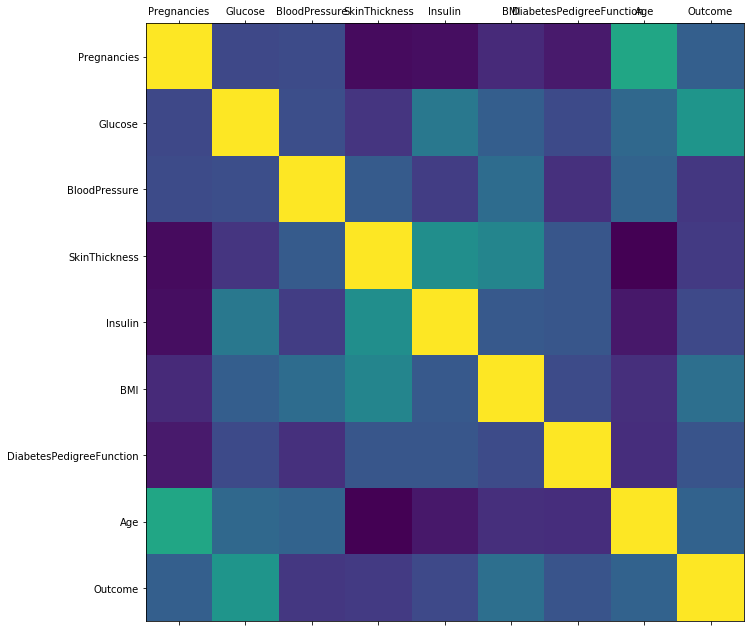

In [24]:
plot_corr(df)

In [25]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [26]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
